# **🏠 부동산 실거래가 EDA**
## Contents
1. Library import 
2. Data Load
3. Target value 분포 확인을 위한 histogram 확인
4. 범주형 클래스별 target value histogram overlay
5. 연속형 변수들 간의 correlation matrix


### 1. Library Import
> 필요한 라이브러리를 불러옵니다.

In [1]:
# !pip install eli5==0.13.0

# 한글 폰트 사용을 위한 라이브러리입니다.
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False 
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

### 2. Data Load

#### 2.1. 데이터 로드

In [3]:
# 필요한 데이터를 load 하겠습니다. 경로는 환경에 맞게 지정해주면 됩니다.
train_path = '/root/dev/Ml_Team2_fork/1.Data/train.csv'
test_path  = '/root/dev/Ml_Team2_fork/1.Data/test.csv'
df = pd.read_csv(train_path) # train set
df_test = pd.read_csv(test_path) # test set 

In [4]:
# data shape check
print(f'train set shape : {df.shape} \ntest set shape : {df_test.shape}')

train set shape : (1118822, 52) 
test set shape : (9272, 51)


In [5]:
# head check
df.head(3)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1118822 non-null  object 
 1   번지                      1118597 non-null  object 
 2   본번                      1118747 non-null  float64
 3   부번                      1118747 non-null  float64
 4   아파트명                    1116696 non-null  object 
 5   전용면적(㎡)                 1118822 non-null  float64
 6   계약년월                    1118822 non-null  int64  
 7   계약일                     1118822 non-null  int64  
 8   층                       1118822 non-null  int64  
 9   건축년도                    1118822 non-null  int64  
 10  도로명                     1118822 non-null  object 
 11  해제사유발생일                 5983 non-null     float64
 12  등기신청일자                  1118822 non-null  object 
 13  거래유형                    1118822 non-null  object 
 14  중개

### 3. Target value 분포 확인을 위한 histogram 확인

In [7]:
# skewness 확인을 위한 skew 함수 로드
from scipy.stats import skew

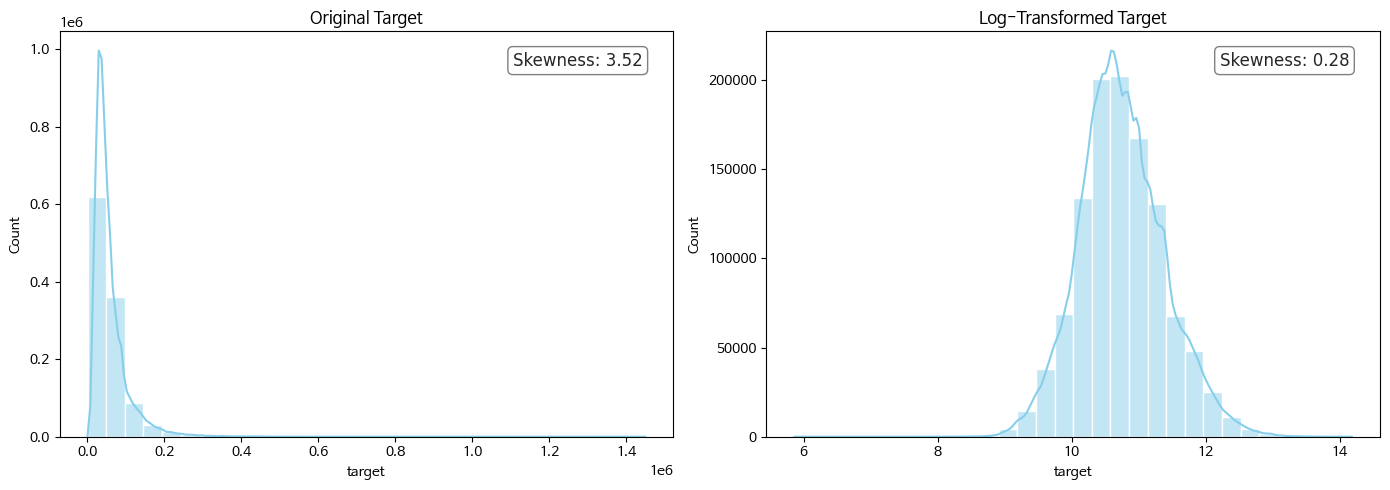

In [8]:
# 원본, 로그변환 데이터
targets = [df['target'], np.log1p(df['target'])]
titles = ['Original Target', 'Log-Transformed Target']

# 서브플롯
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.set_style('whitegrid')

for i, (data, title) in enumerate(zip(targets, titles)):
    skew_val = skew(data)
    sns.histplot(data, kde=True, ax=axes[i], color='skyblue', bins=30)
    axes[i].set_title(title)
    
    # 왜도 값 텍스트로 표시 (오른쪽 상단)
    axes[i].text(
        0.95, 0.95, 
        f'Skewness: {skew_val:.2f}', 
        transform=axes[i].transAxes,  # 축 상대 좌표계
        ha='right', va='top',
        fontsize=12,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray')
    )

plt.tight_layout()
plt.show()

In [9]:
# log scale target 생성
df['target_log'] = np.log1p(df['target'])

### 4. 범주형 클래스별 target value histogram overlay

In [10]:
# 문자열 변경을 위한 re import
import re

In [11]:
key_list = {}

for text in list(df.columns):
    # '전용면적별세대현황'으로 시작하면 괄호 제거 안함
    if text.startswith('k-전용면적별세대'): # 그냥 괄호를 제거하면 중복된 이름이 발생하기 때문에 처리한 예외 처리 
        cleaned = re.sub(r'^k-', '', text).strip()

    else :
        cleaned = re.sub(r'\(.*?\)','',text)
        cleaned = re.sub(r'^k-','',cleaned)
        cleaned = cleaned.strip()
    key_list[text] = cleaned
print(key_list)

{'시군구': '시군구', '번지': '번지', '본번': '본번', '부번': '부번', '아파트명': '아파트명', '전용면적(㎡)': '전용면적', '계약년월': '계약년월', '계약일': '계약일', '층': '층', '건축년도': '건축년도', '도로명': '도로명', '해제사유발생일': '해제사유발생일', '등기신청일자': '등기신청일자', '거래유형': '거래유형', '중개사소재지': '중개사소재지', 'k-단지분류(아파트,주상복합등등)': '단지분류', 'k-전화번호': '전화번호', 'k-팩스번호': '팩스번호', '단지소개기존clob': '단지소개기존clob', 'k-세대타입(분양형태)': '세대타입', 'k-관리방식': '관리방식', 'k-복도유형': '복도유형', 'k-난방방식': '난방방식', 'k-전체동수': '전체동수', 'k-전체세대수': '전체세대수', 'k-건설사(시공사)': '건설사', 'k-시행사': '시행사', 'k-사용검사일-사용승인일': '사용검사일-사용승인일', 'k-연면적': '연면적', 'k-주거전용면적': '주거전용면적', 'k-관리비부과면적': '관리비부과면적', 'k-전용면적별세대현황(60㎡이하)': '전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)': '전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하': '85㎡~135㎡이하', 'k-135㎡초과': '135㎡초과', 'k-홈페이지': '홈페이지', 'k-등록일자': '등록일자', 'k-수정일자': '수정일자', '고용보험관리번호': '고용보험관리번호', '경비비관리형태': '경비비관리형태', '세대전기계약방법': '세대전기계약방법', '청소비관리형태': '청소비관리형태', '건축면적': '건축면적', '주차대수': '주차대수', '기타/의무/임대/임의=1/2/3/4': '기타/의무/임대/임의=1/2/3/4', '단지승인일': '단지승인일', '사용허가여부': '사용허가여부', '관리비 업로드': '관리비 업로드

In [12]:
# 복잡한 피처명 변경

df = df.rename(columns = key_list)
df_test = df_test.rename(columns = key_list)

In [13]:
# 연속형 변수와 범주형 변수 분리
continuous_columns = []
categorical_columns = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]): # pandas library 안에 api.types.is_numeric_dtype이라는 함수 즉 뉴머릭타입인지 반환해주는 함수를 통해 찬반
        continuous_columns.append(column) # 뉴머릭인 경우 반환
    else:
        categorical_columns.append(column) # 범주형인 경우 반환

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['본번', '부번', '전용면적', '계약년월', '계약일', '층', '건축년도', '해제사유발생일', '단지소개기존clob', '전체동수', '전체세대수', '연면적', '주거전용면적', '관리비부과면적', '전용면적별세대현황(60㎡이하)', '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'target_log']
범주형 변수: ['시군구', '번지', '아파트명', '도로명', '등기신청일자', '거래유형', '중개사소재지', '단지분류', '전화번호', '팩스번호', '세대타입', '관리방식', '복도유형', '난방방식', '건설사', '시행사', '사용검사일-사용승인일', '홈페이지', '등록일자', '수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']


#### **범주형 피처 확인**

In [14]:
cat_col = iter(categorical_columns)
print(len(categorical_columns))

29


In [15]:
temp = next(cat_col)

print(f'범주형 변수 이름 : {temp}')
df[temp].value_counts()
# 의미가 있나 ?

# 큰 의미가 없어보이는 변수 : 번지, 아파트명, 도로명, 등기신청일자, 거래유형, 중개사소재지, 단지분류, 전화번호, 팩스번호, 
# 세대타입, 관리방식, 복도유형, 난방방식, 건설사, 시행사, 사용검사일-사용승인일, 홈페이지, 등록일자, 수정일자, 고용보험관리번호, 경비비관리형태
# 세대전기계약방법, 청소비관리형태, 기타/의무/임대/임의=1/2/3/4, 단지승인일, 사용허가여부, 관리비 업로드, 단지신청일



# 홈페이지 = 데이터가져온 곳을 의미하는듯, 등록일자: 데이터가 처음 시스템에 등록된 날짜, 수정일자: 해당 데이터가 수정되거나 갱신된 마지막 날짜
# 고용보험관리번호 : 그냥 유니크한 id, 단지승인일, 사용허가여부, 관리비 업로드, 단지신청일
# 경비비관리 형태
# 단지분류에 따라 가격형성이 다를 수 있음 아파트 주상복합은 주로 고가
# 도시형생활주택 + 연립주택은 저렴한 분양가를 형성하고 있는것으로 알려져 있음 

# overlay된 히스토그램을 살펴보니 연립 주택(고가) vs 생활주택(저가)로 구분은 할 수 있으나 아파트에 비해 분포가 매우 적어 반영이 힘들어보임
# 건설사가 큰 의미가 없어보임 어떤 건설사가 지었는지 보다는 어느 지역에 지었졌는지가 더 중요한듯



범주형 변수 이름 : 시군구


서울특별시 노원구 상계동    44948
서울특별시 노원구 중계동    26357
서울특별시 양천구 신정동    23569
서울특별시 도봉구 창동     23101
서울특별시 구로구 구로동    22811
                 ...  
서울특별시 중구 필동1가        6
서울특별시 용산구 주성동        5
서울특별시 종로구 연지동        4
서울특별시 마포구 구수동        3
서울특별시 중구 입정동         1
Name: 시군구, Length: 339, dtype: int64

In [18]:
df['구'] = df['시군구'].map(lambda x : x.split(' ')[1])
df['동'] = df['시군구'].map(lambda x : x.split(' ')[2])
del df['시군구']

df['계약년'] = df['계약년월'].astype('str').map(lambda x : x[:4])
df['계약월'] = df['계약년월'].astype('str').map(lambda x : x[4:])
del df['계약년월']

In [19]:
# feature name update 
continuous_columns = []
categorical_columns = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]): # pandas library 안에 api.types.is_numeric_dtype이라는 함수 즉 뉴머릭타입인지 반환해주는 함수를 통해 찬반
        continuous_columns.append(column) # 뉴머릭인 경우 반환
    else:
        categorical_columns.append(column) # 범주형인 경우 반환

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['본번', '부번', '전용면적', '계약일', '층', '건축년도', '해제사유발생일', '단지소개기존clob', '전체동수', '전체세대수', '연면적', '주거전용면적', '관리비부과면적', '전용면적별세대현황(60㎡이하)', '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'target_log']
범주형 변수: ['번지', '아파트명', '도로명', '등기신청일자', '거래유형', '중개사소재지', '단지분류', '전화번호', '팩스번호', '세대타입', '관리방식', '복도유형', '난방방식', '건설사', '시행사', '사용검사일-사용승인일', '홈페이지', '등록일자', '수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일', '구', '동', '계약년', '계약월']


In [32]:
select_col = [*categorical_columns[-4:], *continuous_columns]
print(select_col)

['구', '동', '계약년', '계약월', '본번', '부번', '전용면적', '계약일', '층', '건축년도', '해제사유발생일', '단지소개기존clob', '전체동수', '전체세대수', '연면적', '주거전용면적', '관리비부과면적', '전용면적별세대현황(60㎡이하)', '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '135㎡초과', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'target_log']


In [ ]:
df = df[select_col]
df_test = df_test[:-2]

#### 청소비관리형태

큰 구분을 지어주는 형태에 변수는 아닌듯

<Axes: xlabel='target', ylabel='Density'>

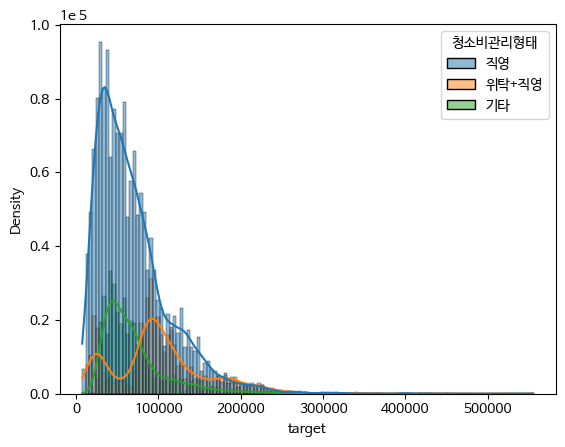

In [137]:
# 청소비관리형태

sns.histplot(data = df[df['청소비관리형태'] != '위탁'], x = 'target', hue ='청소비관리형태', kde = True, stat = 'density', alpha = .5)
# sns.histplot(data = df, x = 'target', hue ='청소비관리형태', kde = True, stat = 'density', alpha = .5)

# target_log
# sns.histplot(data = df[df['청소비관리형태'] != '위탁'], x = 'target_log', hue ='청소비관리형태', kde = True, stat = 'density', alpha = .5)
# sns.histplot(data = df, x = 'target_log', hue ='청소비관리형태', kde = True, stat = 'density', alpha = .5)



#### 세대전기계약방법
> 비슷한 크기의 관측치와 종합계약인 경우 다소 높은 가격대를 형성하고 있는 것을 확인 할 수 있음

<Axes: xlabel='target_log', ylabel='Density'>

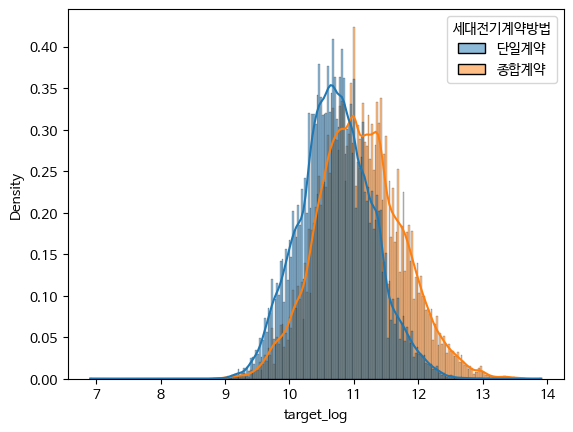

In [138]:
# 세대전기계약방법

# sns.histplot(data = df, x = 'target', hue ='세대전기계약방법', kde = True, stat = 'density', alpha = .5)

# target_log
sns.histplot(data = df, x = 'target_log', hue ='세대전기계약방법', kde = True, stat = 'density', alpha = .5)



#### 경비비관리형태
다른 범주형과 맞찬가지로 분포에 큰 구분이 없어보임

<Axes: xlabel='target', ylabel='Density'>

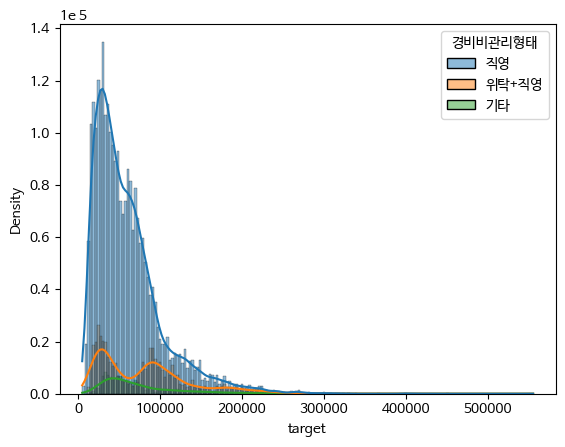

In [95]:
# 경비비관리형태

sns.histplot(data = df[df['경비비관리형태'] != '위탁'], x = 'target', hue ='경비비관리형태', kde = True, stat = 'density', alpha = .5)
# sns.histplot(data = df, x = 'target', hue ='경비비관리형태', kde = True, stat = 'density', alpha = .5)

# target_log
# sns.histplot(data = df[df['경비비관리형태'] != '위탁'], x = 'target_log', hue ='경비비관리형태', kde = True, stat = 'density', alpha = .5)
# sns.histplot(data = df, x = 'target_log', hue ='경비비관리형태', kde = True, stat = 'density', alpha = .5)



#### 난방방식

|구분|개별난방|중앙난방|지역난방|
|---|---------|-----------------|--------------|
|열원위치|각 세대별 보일러| 아파트 단지 내 중앙 보일러실 | 외부 지역 열원시설|
|관리 방식| 개인이 관리| 관리사무소에서 관리|외부 열공급 업체가 공급|
|요금|자율 조절 가능|공급 비례 부과|외부 요금 체계 적용|
|유지보수|개인 부담|단지 부담|공급 업체 부담|

지역난방은 주로 수도권 신도시(판교, 위례, 세종시 등)이나 최근 지은 대형 아파트 단지, 난방공사와 연계된 도시 기반 시설지역에 많이 설치되어 있음

<Axes: xlabel='target', ylabel='Density'>

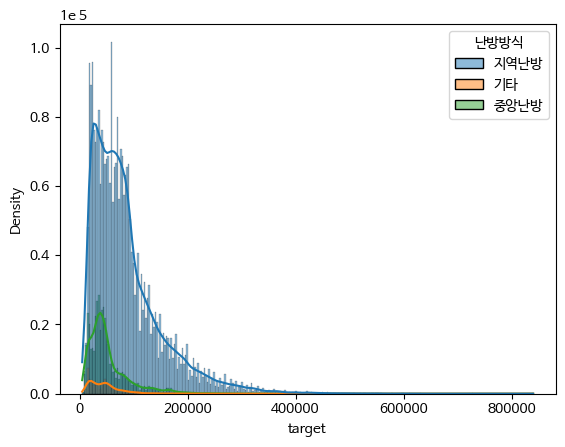

In [79]:
# 난방방식

sns.histplot(data = df[df['난방방식'] != '개별난방'], x = 'target', hue ='난방방식', kde = True, stat = 'density', alpha = .5)
# sns.histplot(data = df, x = 'target', hue ='난방방식', kde = True, stat = 'density', alpha = .5)

# target_log
# sns.histplot(data = df[df['난방방식'] != '개별난방'], x = 'target_log', hue ='난방방식', kde = True, stat = 'density', alpha = .5)
# sns.histplot(data = df, x = 'target_log', hue ='난방방식', kde = True, stat = 'density', alpha = .5)



#### 복도유형

<Axes: xlabel='target_log', ylabel='Density'>

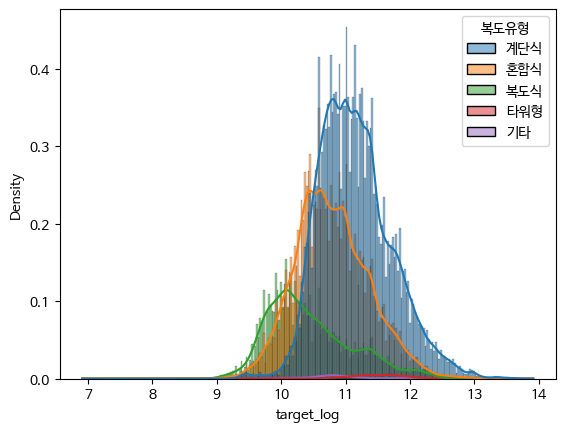

In [75]:
# 복도유형

# sns.histplot(data = df[df['복도유형'] != '계단식'], x = 'target', hue ='복도유형', kde = True, stat = 'density', alpha = .5)
# sns.histplot(data = df, x = 'target', hue ='복도유형', kde = True, stat = 'density', alpha = .5)

# target_log
# sns.histplot(data = df[df['복도유형'] != '계단식'], x = 'target_log', hue ='복도유형', kde = True, stat = 'density', alpha = .5)
sns.histplot(data = df, x = 'target_log', hue ='복도유형', kde = True, stat = 'density', alpha = .5)

# 계단식에 비해 복도식이 조금 저가형으로 보여짐 분포의 중심이 다른 것으로 보여져 변수로서 모델에 추가가된다면 무의미하지 않을 것으로 생각되지만 큰 영향은
# 없을 것으로 사료됨 


#### 관리방식

<Axes: xlabel='target', ylabel='Density'>

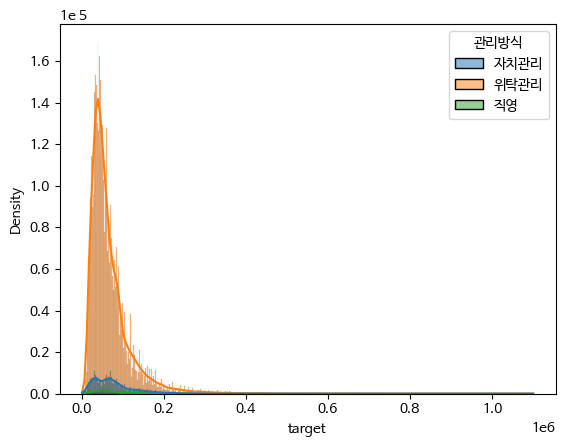

In [72]:
# 관리방식
# sns.histplot(data = df[df['관리방식'] != '위탁관리'], x = 'target', hue ='관리방식', kde = True, stat = 'density', alpha = .5)
sns.histplot(data = df, x = 'target', hue ='관리방식', kde = True, stat = 'density', alpha = .5)

# target_log
# sns.histplot(data = df[df['관리방식'] != '위탁관리'], x = 'target_log', hue ='관리방식', kde = True, stat = 'density', alpha = .5)
# sns.histplot(data = df, x = 'target_log', hue ='관리방식', kde = True, stat = 'density', alpha = .5)

# 관리방식에 차이에 따라 주택가격에 차이가 있어보이지는 않아 보임


#### 세대타입

<Axes: xlabel='target_log', ylabel='Density'>

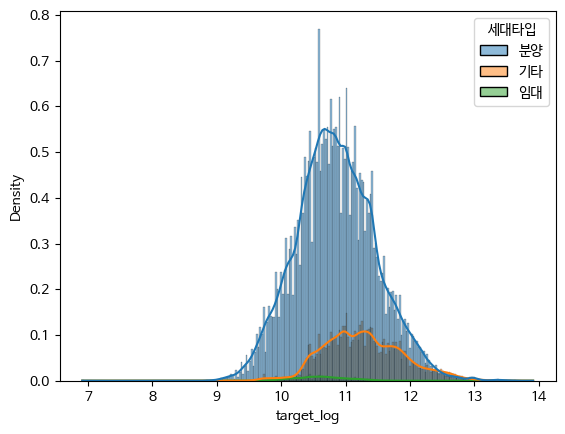

In [67]:
# 세대타입
# sns.histplot(data = df[df['세대타입'] != '분양'], x = 'target', hue ='세대타입', kde = True, stat = 'density', alpha = .5)
# sns.histplot(data = df, x = 'target', hue ='세대타입', kde = True, stat = 'density', alpha = .5)

# target_log
# sns.histplot(data = df[df['세대타입'] != '분양'], x = 'target_log', hue ='세대타입', kde = True, stat = 'density', alpha = .5)
sns.histplot(data = df, x = 'target_log', hue ='세대타입', kde = True, stat = 'density', alpha = .5)

# 세대타입으로 큰 구분은 힘들어 보임, 기타 임대끼리 비교했을 때 비교적 임대를 한 세대타입이 상대적으로 낮은 금액대를 형성하지만 수가 압도적으로 적고
# 유의미하게 분포가 차이가 나지 않아 분리가 힘들어 보임

#### 단지분류

<Axes: xlabel='target', ylabel='Density'>

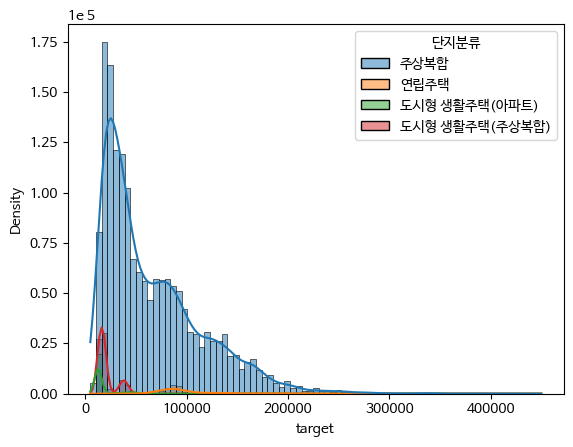

In [60]:
sns.histplot(data = df[df['단지분류'] != '아파트' ], x = 'target', hue = '단지분류', kde = True, stat = 'density', alpha = .5)
# sns.histplot(data = df, x = 'target_log', hue = '단지분류', kde = True, stat = 'density', alpha = .5)

#### 등기신청일자

In [38]:
df['등기신청일자'] = df['등기신청일자'].replace(' ', np.nan)

In [46]:
sorted(list(df['등기신청일자'].unique())[1:]) # 등기신청일자 23년 1월 부터 9월 22일까지의 데이터 
# 빈 공란으로 이루어져있던 곳이 대부분 등기신청일은 의미가 없는 듯 

['20230102',
 '20230104',
 '20230105',
 '20230109',
 '20230110',
 '20230111',
 '20230112',
 '20230113',
 '20230116',
 '20230117',
 '20230118',
 '20230119',
 '20230120',
 '20230125',
 '20230126',
 '20230127',
 '20230130',
 '20230131',
 '20230201',
 '20230202',
 '20230203',
 '20230206',
 '20230207',
 '20230208',
 '20230209',
 '20230210',
 '20230213',
 '20230214',
 '20230215',
 '20230216',
 '20230217',
 '20230220',
 '20230221',
 '20230222',
 '20230223',
 '20230224',
 '20230227',
 '20230228',
 '20230302',
 '20230303',
 '20230306',
 '20230307',
 '20230308',
 '20230309',
 '20230310',
 '20230313',
 '20230314',
 '20230315',
 '20230316',
 '20230317',
 '20230320',
 '20230321',
 '20230322',
 '20230323',
 '20230324',
 '20230327',
 '20230328',
 '20230329',
 '20230330',
 '20230331',
 '20230403',
 '20230404',
 '20230405',
 '20230406',
 '20230407',
 '20230410',
 '20230411',
 '20230412',
 '20230413',
 '20230414',
 '20230417',
 '20230418',
 '20230419',
 '20230420',
 '20230421',
 '20230424',
 '20230425',

#### 기타/의무/임대/임의

의무    239198
기타      4177
임의      3682
임대      2202
Name: 기타/의무/임대/임의=1/2/3/4, dtype: int64


<Axes: xlabel='target', ylabel='Density'>

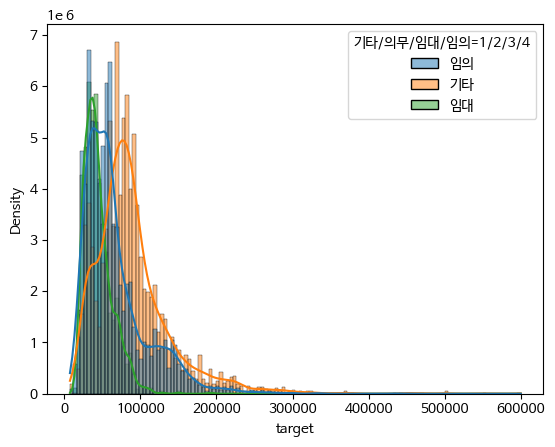

In [54]:
print(df['기타/의무/임대/임의=1/2/3/4'].value_counts())

sns.histplot(data = df[df['기타/의무/임대/임의=1/2/3/4'] != '의무'], x = 'target', hue = '기타/의무/임대/임의=1/2/3/4', alpha = .5, stat = 'density', kde = True)
# sns.histplot(data = df, x = 'target', hue = '기타/의무/임대/임의=1/2/3/4', alpha = .5, stat = 'density', kde = True)

> '기타/의무/임대/임의=1/2/3/4' 해당 feature는 절대 다수인 의무를 제외한 

In [207]:
# Lasso를 위한 library import

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

### 결측치 처리

In [214]:
# 위 처럼 아무 의미도 갖지 않는 칼럼은 결측치와 같은 역할을 하므로, np.nan으로 채워 결측치로 인식되도록 합니다.
df['등기신청일자'] = df['등기신청일자'].replace(' ', np.nan)
df['거래유형'] = df['거래유형'].replace('-', np.nan)
df['중개사소재지'] = df['중개사소재지'].replace('-', np.nan)

In [215]:
# Null값이 100만개 이상인 칼럼은 삭제해보도록 하겠습니다.
print(' 결측치가 100만개 이하인 변수들 :', list(df.columns[df.isnull().sum() <= 1000000]))     # 남겨질 변수들은 아래와 같습니다.
print(' 결측치가 100만개 이상인 변수들 :', list(df.columns[df.isnull().sum() >= 1000000]))

 결측치가 100만개 이하인 변수들 : ['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '도로명', '단지분류', '전화번호', '팩스번호', '세대타입', '관리방식', '복도유형', '난방방식', '전체동수', '전체세대수', '건설사', '시행사', '사용검사일-사용승인일', '연면적', '주거전용면적', '관리비부과면적', '전용면적별세대현황(60㎡이하)', '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target']
 결측치가 100만개 이상인 변수들 : ['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지소개기존clob', '135㎡초과', '홈페이지', '등록일자']


In [216]:
# 위에서 결측치가 100만개 이하인 변수들만 골라 새로운 concat_select 객체로 저장해줍니다.
selected = list(df.columns[df.isnull().sum() <= 1000000])
df_select = df[selected]

In [217]:
df_select.isnull().sum()  

시군구                          0
번지                         225
본번                          75
부번                          75
아파트명                      2126
전용면적                         0
계약년월                         0
계약일                          0
층                            0
건축년도                         0
도로명                          0
단지분류                    870691
전화번호                    870274
팩스번호                    872742
세대타입                    869563
관리방식                    869563
복도유형                    869890
난방방식                    869563
전체동수                    870630
전체세대수                   869563
건설사                     871058
시행사                     871254
사용검사일-사용승인일             869696
연면적                     869563
주거전용면적                  869608
관리비부과면적                 869563
전용면적별세대현황(60㎡이하)        869608
전용면적별세대현황(60㎡~85㎡이하)    869608
85㎡~135㎡이하              869608
수정일자                    869608
고용보험관리번호                913304
경비비관리형태                 870988
세대전기계약방법

In [218]:
# 본번, 부번의 경우 float로 되어있지만 범주형 변수의 의미를 가지므로 object(string) 형태로 바꾸어주고 아래 작업을 진행하겠습니다.
df_select['본번'] = df_select['본번'].astype('str')
df_select['부번'] = df_select['부번'].astype('str')

In [219]:
# numeric categorical feature split
num_features = df_select.select_dtypes(include=['number']).columns.tolist()
cat_features = df_select.select_dtypes(include=['object']).columns.tolist()

print("연속형 변수:", num_features)
print("범주형 변수:", cat_features)

연속형 변수: ['전용면적', '계약년월', '계약일', '층', '건축년도', '전체동수', '전체세대수', '연면적', '주거전용면적', '관리비부과면적', '전용면적별세대현황(60㎡이하)', '전용면적별세대현황(60㎡~85㎡이하)', '85㎡~135㎡이하', '건축면적', '주차대수', '좌표X', '좌표Y', 'target']
범주형 변수: ['시군구', '번지', '본번', '부번', '아파트명', '도로명', '단지분류', '전화번호', '팩스번호', '세대타입', '관리방식', '복도유형', '난방방식', '건설사', '시행사', '사용검사일-사용승인일', '수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']


In [220]:
# 범주형 변수에 대한 보간
df_select[cat_features] = df_select[cat_features].fillna('NULL')

# 연속형 변수에 대한 보간 (선형 보간)
df_select[num_features] = df_select[num_features].interpolate(method='linear', axis=0) # quadratic / cubic 좀더 급격한 변화가 있는 데이터인 경우 적용 할 수 있음
# spline 부드러움이 중요한 경우에 적용할 수 있는 방법론
# pchip : 값의 급격한 변화나 overshooting 이 걱정 될때
# akima 진동억제를 원할 때 (시계열 데이터에서 유용)

In [222]:
print(df_select.isnull().sum())
print(df_select.shape)

시군구                     0
번지                      0
본번                      0
부번                      0
아파트명                    0
전용면적                    0
계약년월                    0
계약일                     0
층                       0
건축년도                    0
도로명                     0
단지분류                    0
전화번호                    0
팩스번호                    0
세대타입                    0
관리방식                    0
복도유형                    0
난방방식                    0
전체동수                    0
전체세대수                   0
건설사                     0
시행사                     0
사용검사일-사용승인일             0
연면적                     0
주거전용면적                  0
관리비부과면적                 0
전용면적별세대현황(60㎡이하)        0
전용면적별세대현황(60㎡~85㎡이하)    0
85㎡~135㎡이하              0
수정일자                    0
고용보험관리번호                0
경비비관리형태                 0
세대전기계약방법                0
청소비관리형태                 0
건축면적                    0
주차대수                    0
기타/의무/임대/임의=1/2/3/4     0
단지승인일                   0
사용허가여부      

### **Lasso를 통해 변수 제거**

##### model fitting을 위한 작업

In [234]:
# lasso

x_train = df_select.drop(columns = 'target')
y_train = df_select['target']

# numeric categorical feature split
num_features = x_train.select_dtypes(include=['number']).columns.tolist()
cat_features = x_train.select_dtypes(include=['object']).columns.tolist()

# preprocessing pipe line
preprocessor = ColumnTransformer(transformers = [
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop = 'first'), cat_features)
])

# 파이프라인 : 전처리 -> LassoCV
model = Pipeline(steps = [
    ('preprocess', preprocessor),
    ('lasso', LassoCV(cv = 5, random_state = 42))
])

In [2]:
print(x_train.shape, y_train.shape)

NameError: name 'x_train' is not defined

In [ ]:
# model train
model.fit(x_train, y_train)

# check choose feature
lasso = model.named_steps['lasso']
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
coef = pd.Series(lasso.coef_, index = feature_names)

print('0이 아닌 변수들:')
print(coef[coef != 0].sort_values())

In [236]:
for col in x_train.columns:
    unique_types = x_train[col].map(type).unique()
    if len(unique_types) > 1:
        print(f"⚠️ '{col}' 열에 섞인 타입: {unique_types}")

⚠️ '전화번호' 열에 섞인 타입: [<class 'str'> <class 'float'>]
⚠️ '팩스번호' 열에 섞인 타입: [<class 'str'> <class 'float'>]


In [237]:
x_train['전화번호'] = x_train['전화번호'].astype(str)
df_test['전화번호'] = df_test['전화번호'].astype(str)

x_train['팩스번호'] = x_train['팩스번호'].astype(str)
df_test['팩스번호'] = df_test['팩스번호'].astype(str)

In [ ]:
# 거래량이 활발한 곧이 거래금액이 높을까 ?

temp = df.groupby(['좌표X', '좌표Y'])['target'].agg(['mean', 'count']).sort_values('count', ascending = False)

In [ ]:
temp

,,mean,count
좌표X,좌표Y,,
127.088451,37.512752,118830.495046,3028
127.058521,37.480002,100058.635298,2816
127.114376,37.488521,111547.059869,2589
127.065070,37.497741,123609.511710,2562
127.066569,37.642724,25800.303043,2465
...,...,...,...
126.904871,37.488308,62000.000000,1
127.095752,37.585561,65000.000000,1
127.070158,37.630117,17300.000000,1


<Axes: xlabel='count', ylabel='mean'>

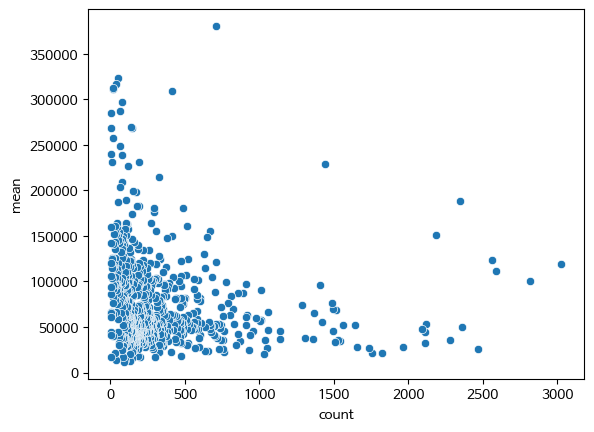

In [ ]:
sns.scatterplot(data = temp, x = 'count', y = 'mean') 
# 딱히 거래량이 많다고 평균 금액이 높아보이지 않아 보임